<a href="https://colab.research.google.com/github/alexallen7/AH2179/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np

data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")

In [23]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)

# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])

# Define the total number of 5-minute intervals in a day
nintvals = 288

# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)

# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]


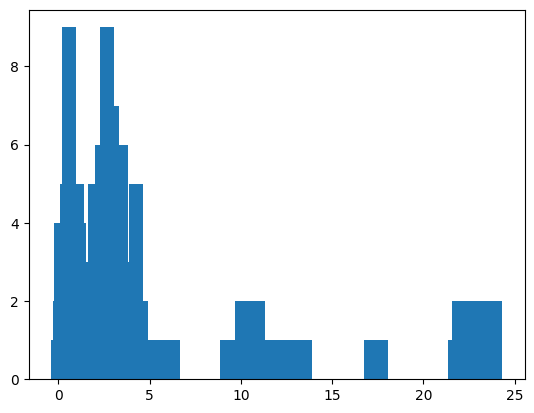

In [24]:
nans_per_time = np.sum(np.isnan(vectorized_day_dataset),0)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# Create an array 'x_axis' representing the 5-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)
# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []
# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
  x_axis_hours.append(float(x_axis[i]*5)/60)
ax.bar(x_axis_hours,height=nans_per_time)

nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)

In [25]:
import datetime

# Create an array 'day_of_week' to store the day of the week for each unique date
day_of_week = np.zeros((ndays))

# Loop through each unique date
for i in range(0, ndays):
    # Parse the current date from a string to a datetime object
    day_dt = datetime.datetime.strptime(str(days[i]), '%Y%m%d')

    # Get the day of the week (1 for Monday, 2 for Tuesday, ..., 7 for Sunday)
    day_of_week[i] = day_dt.isoweekday()

In [31]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
n_clusters = 2
clusters = None
#print(np.where(nans_per_day > 0)[0])
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
days_not_nans = days[np.where(nans_per_day == 0)[0]]

# BELOW lines enables you to comment in and out clustering method you want to use note that GMM have different ouput and thus labels are extracted differently
#clusters = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# clusters = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean', linkage='ward').fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# clusters = DBSCAN(eps=500, min_samples = 2).fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

if clusters is not None:
  cluster_labels = clusters.labels_

cluster_labels = GaussianMixture(n_components=n_clusters).fit(vectorized_day_dataset_no_nans).predict(vectorized_day_dataset_no_nans) #check the parameters at  https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_init.html#sphx-glr-auto-examples-mixture-plot-gmm-init-py

# Calculate the Silhouette Score
SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels)
# Silhouette Score measures the quality of clusters, higher values indicate better separation.

# Calculate the Davies-Bouldin Score
DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels)
# Davies-Bouldin Score measures the average similarity between each cluster and its most similar cluster, lower values indicate better separation.

# Calculate the Calinski-Harabasz Score
CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels)
# Calinski-Harabasz Score measures the ratio of between-cluster variance to within-cluster variance, higher values indicate better separation.




In [32]:
# Calculate the number of clusters by finding unique values in 'cluster_labels'
n_clusters_t = len(np.unique(cluster_labels))

In [33]:
# Read the evaluation dataset from a CSV file
data_eval_df = pd.read_csv("evaluation_dataset_exercise_5_clustering_highway_traffic.csv", sep=";")

# Sort the evaluation DataFrame by columns "Date" and "Interval_5"
data_eval_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted evaluation DataFrame
days_eval = np.unique(data_eval_df[['Date']].values.ravel())
# Calculate the total number of unique days in the evaluation dataset
ndays_eval = len(days_eval)

# Group the evaluation DataFrame by the "Date" column
day_eval_subsets_df = data_eval_df.groupby(["Date"])

# Initialize a matrix 'vectorized_day_dataset_eval' filled with NaN values
vectorized_day_dataset_eval = np.zeros((ndays_eval, nintvals))
vectorized_day_dataset_eval.fill(np.nan)
# This section initializes a 2D array to store the evaluation dataset and fills it with NaN values.

# Loop through each unique day in the evaluation dataset
for i in range(0, ndays_eval):
    # Get the DataFrame corresponding to the current day
    df_t = day_eval_subsets_df.get_group(days_eval[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame (this line is redundant)
        df_t = day_eval_subsets_df.get_group(days_eval[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset_eval'
        vectorized_day_dataset_eval[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset_eval'
print(vectorized_day_dataset_eval)

[[35. 29. 32. ... 62. 66. 71.]
 [44. 44. 51. ... 30. 31. 23.]
 [21. 22. 17. ... 20. 22. 22.]
 ...
 [17. 17. 20. ... 35. 25. 27.]
 [37. 25. 30. ... 37. 36. 49.]
 [42. 28. 32. ... 45. 49. 38.]]


In [34]:
# Calculate the number of days with missing values
nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval), 1)


# Filter out days with no missing values and create a new dataset
vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval == 0)[0], :]
days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]

# Calculate the total number of days in the filtered evaluation dataset
ndays_eval_not_nans = len(days_not_nans_eval)

In [35]:
# Import the pairwise_distances function from scikit-learn's metrics library
import sklearn.metrics.pairwise as dis_lib

# Define a function to find the closest centroid to a new data point within a specified day-time interval range
def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
    closest_centroid = None
    closest_dist = None

    # Iterate through each centroid
    for i in range(0, len(centroids)):
        # Calculate the Euclidean distance between the centroid and the new data point
        ed_t = dis_lib.paired_distances(centroids[i], new_day, metric='euclidean')

        # Check if the current centroid is closer than the previously closest one
        if closest_centroid is None or closest_dist > ed_t:
            closest_centroid = i
            closest_dist = ed_t

    return closest_centroid

# Initialize a list to store centroid data
centroids = []

# Calculate centroids for each cluster
for i in np.unique(cluster_labels):
    centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).reshape(1, nintvals)
    centroids.append(centroid)

# Define the number of past intervals to consider for classification
n_past_intervals_for_classification = 5

# Initialize variables to calculate accuracy metrics
total_mae = 0
total_mape = 0
prediction_counts = 0

# Loop through each day in the evaluation dataset with no missing values
for i in range(0, ndays_eval_not_nans):
    # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        # Find the closest centroid for the current data point
        centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

        # Predict the value for the next interval
        predicted_value = centroids[centroid_index][0, j + 1]

        # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
        mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
        mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

        # Accumulate MAE, MAPE, and count of predictions
        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

# Calculate and print the prediction accuracy metrics
print('Prediction accuracy MAE:', total_mae / prediction_counts)
print('Prediction accuracy MAPE:', total_mape / prediction_counts)

print('Silhouette Score:', SC_score)
print('Davies-Bouldin Score:', DB_score)
print('Calinski-Harabasz Score:', CH_score)


Prediction accuracy MAE: 32.57421525988162
Prediction accuracy MAPE: 0.44248197239664977
Silhouette Score: 0.30762127308637705
Davies-Bouldin Score: 1.2677249598188514
Calinski-Harabasz Score: 174.1048835493247
